# **Тестовое задание**
на  позицию **«Junior Game Analyst / Product Analyst»**


Компания:   

Исполнитель: **Игорь Сасимович** (ihar.sasimovich@gmail.com, Telegram: http://t.me/ihar367)    
Ссылка на резюме: https://drive.google.com/file/d/1EBLgL8GnqAjtnzZUc_0r5z2idgxOXZST/view?usp=drive_link

### Данные: 

Для выполнения данного задания вам предоставляется xlsx документ с тремя вкладками:

- <span style="color:#FF6861"> **WAU**</span> - в данной вкладке собраны данные о количестве пользователей, игравших в нашу игру в динамике с группировкой по неделям. WAU = Weekly Active Users.

- <span style="color:#FF6861"> **ARPWAU**</span> - в данной вкладке собраны данные о среднем доходе с каждого пользователя, игравшего в игру в динамике с группировкой по неделям. ARPWAU = Average Revenue Per Weekly Active User.

- <span style="color:#FF6861"> **WHCS**</span> - в данной вкладке собраны данные о количестве игровой валюты 🪙, потраченной пользователями на различные категории игровых товаров в динамике с группировкой по неделям. WHCS = Weekly Hard Currency Spendings.

Приведенные в документе данные отображают состояние казуального Free-to-Play мобильного игрового проекта со смешанной монетизацией (реклама и внутриигровые покупки).

-----

## Вопрос 1: Изучение данных


- Изучите предоставленные данные.

- Опишите, какой инструмент для работы с ними вы выбрали и почему. Можно пользоваться любыми инструментами (Google Sheets, Excel, Open Office, Python, R и др.), ограничений нет.

- Расскажите, проводили ли вы какие-либо расчеты на основе предоставленных данных, визуализировали ли их как-то в процессе изучения? Если да, то почему и с какой целью?

<br>

#### Инструмент 🛠️

Для выполнения данного тестового задания я выбрал <span style="color:#A1406B"> **Python 🐍**</span>.
Для этого есть несколько причин:

0. Самая очевидная: он прямо указан в требованиях вакансии - значит, точно не прогадаю 😅;
1. Это один из самых популярных и востребованных инструментов для анализа данных сегодня;
2. В нём легко производить агрегации, расчёты и фильтрации;
3. Легко строить визуализации 📊📈📉, чтобы сразу видеть паттерны и аномалии в данных;
4. Отлично дружит с SQL. Python легко подключается к различным базам данных, что делает его универсальным инструментом в работе с данными.
5. Позволяет масштабировать работу, если понадобится подключить другие датасеты или автоматизировать анализ.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Считываем и знакомимся с данными. 

In [2]:
df_wau = pd.read_excel(r"D:\000_Jupyter_notebooks\05. Test-Tasks\2025 05 Azure Games\Azure Games Analytics Test Assignment Data.xlsx", 
                         sheet_name='WAU')
# df_wau

In [3]:
df_arpwau = pd.read_excel(r"D:\000_Jupyter_notebooks\05. Test-Tasks\2025 05 Azure Games\Azure Games Analytics Test Assignment Data.xlsx", 
                            sheet_name='ARPWAU')
# df_arpwau

Так как метрики <span style="color:#FF6861">WAU</span> и <span style="color:#FF6861">ARPWAU</span> тесно связаны, логично анализировать их в связке.    

<span style="color:#FF6861">WAU</span> отражает <span style="color:#DC4473">масштаб</span> - сколько игроков было активными на неделе, <span style="color:#FF6861">ARPWAU</span> - <span style="color:#DC4473">качество</span> аудитории, то есть сколько в среднем приносил каждый игрок.

Вместе они формируют **важнейший ключевой бизнес-показатель** - **выручку** (<span style="color:#FF6861">**Revenue**</span>) 💵.

Поэтому объединим таблицы для более цельного анализа и рассчитаем <span style="color:#FF6861">Revenue</span>.

In [4]:
df = df_wau.merge(df_arpwau, on='Week', how = 'inner')
df['Revenue'] = df.WAU * df.ARPWAU

df.head()

,Week,WAU,ARPWAU,Revenue
0,1,253646,2.03,514901.38
1,2,253367,2.03,514335.01
2,3,469184,1.22,572404.48
3,4,372201,1.50,558301.50
4,5,281944,1.85,521596.40


Для получения базового представления о метриках, выведим описательную статистику для <span style="color:#FF6861">WAU</span>, <span style="color:#FF6861">ARPWAU</span> и <span style="color:#FF6861">REVENUE</span> с помощью метода **describe()**:

In [5]:
round(df[['WAU', 'ARPWAU', 'Revenue']].describe(),2)

,WAU,ARPWAU,Revenue
count,15.00,15.00,15.00
mean,238824.40,1.68,397029.44
std,82090.78,0.38,131794.11
min,175643.00,1.10,193207.30
25%,192372.00,1.27,264231.51
50%,204321.00,1.85,408642.00
75%,253506.50,2.03,514618.19
max,469184.00,2.09,572404.48


Интерпретируем результаты:

- <span style="color:#FF6861">**WAU:**</span>
    - В среднем: 239K игроков в неделю.
    - Медиана: 204K - половина недель была с WAU ниже этого значения.
    - MIN / MAX: от 176K до 469K, размах - 293K. Это указывает на значительные колебания и возможные выбросы.
    - Стандартное отклонение: 82K - говорит о существенной динамике пользовательской активности по неделям.

Пользовательская база достаточно волотильна от недели к неделе.

- <span style="color:#FF6861">**ARPWAU:**</span> 
    - Среднее значение: 1.68 
    - Медиана выше среднего: 1.85 - данные немного левосторонне скошены (несколько недель с низким ARPWAU).
    - MIN / MAX: от 1.10 до 2.09, размах 0.99 - разброс не очень большой.
    - Стандартное отклонение: 0.38 - изменчивость присутствует, но не экстремальная.

 Назвать ARPWAU стабильным нельзя.

- <span style="color:#FF6861">**REVENUE**</span> 
    - Средняя выручка: 397K $.
    - Медиана выше среднего: 408K - снова левый перекос.
    - MIN / MAX: от 193K до 572K, размах - 379K.  Cильный разброс.
    - Стандартное отклонение: 132K - высокая изменчивость.

Выручка зависит как от колебаний в WAU, так и от изменений в ARPWAU. Пики и просадки могут быть следствием внешних воздействий или игровых событий.


**И так:**
- ARPWAU менее волатилен, чем WAU, но всё же подвержен колебаниям.
- Предположительно, основной драйвер изменений в выручке - динамика WAU.

<br>

**Теперь визуализируем данные. 📊📈📉**   
Для отображения изменения показателей по неделям идеально подойдут линейные графики.

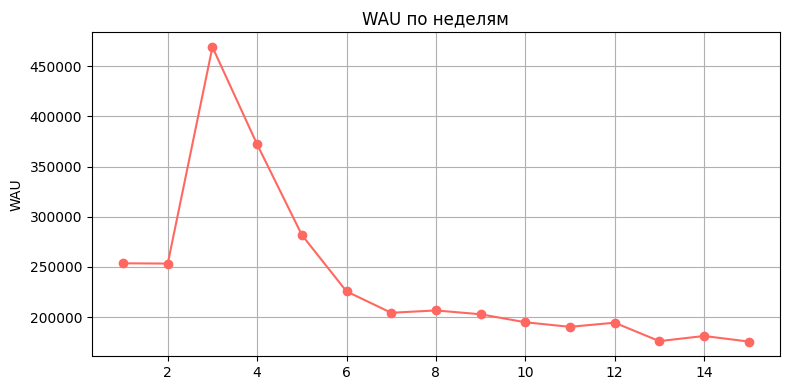

In [6]:
# WAU
plt.figure(figsize=(8, 4))
plt.plot(df['Week'], df['WAU'], marker='o', color='#FF6861')
plt.title('WAU по неделям')
plt.ylabel('WAU')
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color:#FF6861">WAU</span> резко вырос на 3-й неделе, достигнув пика, после чего начал постепенно снижаться - особенно заметно после 4-й недели. Причиной такого всплеска может быть маркетинговая кампания, внутриигровое событие или другой временный фактор, привлёкший большое количество пользователей. В целом, наблюдается слабовыраженная нисходящая тенденция, указывающая на возможное снижение интереса или ослабление удержания аудитории.

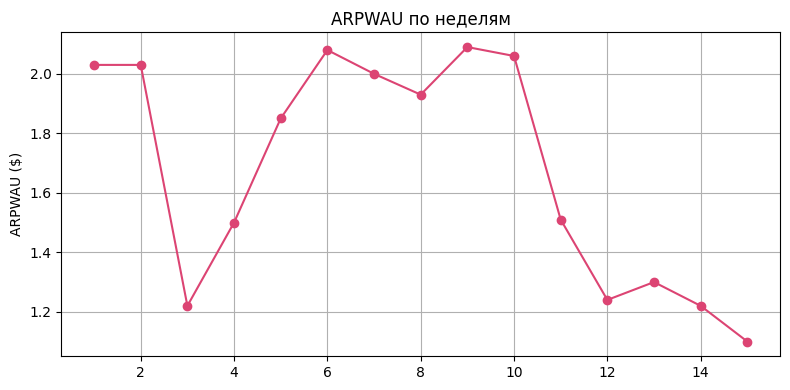

In [7]:
# ARPWAU
plt.figure(figsize=(8, 4))
plt.plot(df['Week'], df['ARPWAU'], marker='o', color='#DC4473')
plt.title('ARPWAU по неделям')
plt.ylabel('ARPWAU ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color:#FF6861">ARPWAU</span> демонстрирует значительные колебания - от 1.10 до 2.09.
Особенно заметны просадки на неделях с аномально высоким WAU (например, 3-я неделя), что может указывать на приток менее платёжеспособной или нецелевой аудитории. Также, снижение ARPWAU могло быть вызвано и акциями.

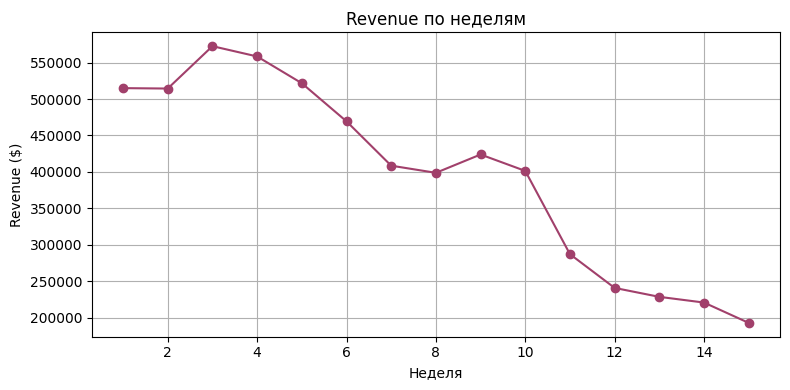

In [8]:
# Revenue
plt.figure(figsize=(8, 4))
plt.plot(df['Week'], df['Revenue'], marker='o', color='#A1406B')
plt.title('Revenue по неделям')
plt.xlabel('Неделя')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

График <span style="color:#FF6861">Revenue</span>  по неделям показывает три четко выраженных этапа.

1. Первый - рост и пик на 3-й неделе. Выручка достигает максимального значения, превышая $570K, на фоне резкого всплеска WAU. Это может говорить о масштабной маркетинговой активности или внутриигровом событии, которое привлекло большое количество игроков. При этом ARPWAU снижается, что указывает на привлечение менее платежеспособной аудитории.

3. Второй этап - постепенное снижение выручки с 4-й по 10-ю неделю. Несмотря на все еще достаточно высокие значения ARPWAU, падение WAU приводит к снижению общего дохода. Это может свидетельствовать об угасании интереса после события или неудачном удержании новых игроков.

3. Третий этап - резкое падение после 10-й недели. Revenue опускается ниже $300K, что, скорее всего, связано с отсутствием новых триггеров вовлечения, снижением активности или окончанием периода акций. Видна тенденция к убыванию, которую стоит дополнительно исследовать на предмет внешних и внутренних факторов.

**⚠️ Наблюдается снижение 📉 эффективности продукта и монетизации. Необходима диагностика причин и принятие мер.**

<br>

Перейдём к <span style="color:#FF6861"> **WHCS**</span>.

In [9]:
df_whcs= pd.read_excel(r"D:\000_Jupyter_notebooks\05. Test-Tasks\2025 05 Azure Games\Azure Games Analytics Test Assignment Data.xlsx", 
                         sheet_name='WHCS')

df_whcs.head()

,Week,Goods ID,Hard Currency Spendings
0,1,Additional Turns,494095
1,1,Lucky Roulette,315380
2,1,Boosters,262817
3,2,Additional Turns,598948
4,2,Lucky Roulette,305346


In [10]:
# 1. Посмотрим на количество уникальных Goods ID
# df_whcs['Goods ID'].nunique()

# 2. Теперь посмотрим сами значения
df_whcs['Goods ID'].unique()

array(['Additional Turns', 'Lucky Roulette', 'Boosters'], dtype=object)

**Итак...**

Игроки расходуют хард-валюту на следующие игровые элементы / категории:
- <span style="color:#FF6861">Additional Turns</span> - дополнительные ходы
- <span style="color:#FF6861">Lucky Roulette</span> - "Колесо удачи"
- <span style="color:#FF6861">Boosters</span> - бустеры, усиливающие игровой процесс

Для анализа поведения игроков и оценки структуры потребления хард-валюты:
1. Развернём таблицу по неделям и категориям, чтобы получить более наглядную картину: сколько и на что тратят игроки.
2. Добавим колонку с общей суммой расходов за каждую неделю - это позволит оценить как общее потребление, так и его динамику.
3. Посмотрим на структуру трат. Рассчитаем доли от общего объёма трат за неделю.

Это поможет ответить на ключевые вопросы:

- Какие категории наиболее "прожорливы" к хард-валюте?
- Как меняется структура трат от недели к неделе?
- Снижение выручки связано с сокращением потребления в целом или перераспределением между категориями?

In [11]:
df_pivot_whcs = df_whcs.pivot(index=["Week"], columns="Goods ID", values="Hard Currency Spendings")
df_pivot_whcs['totall'] = df_pivot_whcs['Additional Turns'] + df_pivot_whcs['Boosters'] + df_pivot_whcs['Lucky Roulette'] 
df_pivot_whcs.head()

Goods ID,Additional Turns,Boosters,Lucky Roulette,totall
Week,,,,
1,494095,262817,315380,1072292
2,598948,187905,305346,1092199
3,943666,462204,577754,1983624
4,711781,378607,408895,1499283
5,595317,274762,309107,1179186


In [12]:
# Опять используем describe()
round(df_pivot_whcs.describe(), 2)

Goods ID,Additional Turns,Boosters,Lucky Roulette,totall
count,15.00,15.00,15.00,15.00
mean,468604.60,196306.93,347672.40,1012583.93
std,183099.45,107068.45,109623.41,331467.89
min,272038.00,90679.00,203475.00,804778.00
25%,324970.00,124225.00,257343.50,815996.50
50%,420657.00,166676.00,315380.00,849901.00
75%,544706.00,225361.00,437876.50,1082245.50
max,943666.00,462204.00,577754.00,1983624.00


Интерпретируем полученные результаты:

- <span style="color:#FF6861">Additional Turns</span>
    - Среднее значение: 469K, медиана ниже - 421K, что может указывать на правосторонний перекос (несколько недель с высокими тратами).
    - MIN / MAX: от 272K до почти 944K, размах 672K - разброс очень большой.
    - Стандартное отклонение: 183K - высокая волатильность.

Категория с крупными колебаниями, вероятно, чувствительна к внутриигровым событиям.

- <span style="color:#FF6861">Boosters</span>
    - Среднее значение: 196K, медиана ниже среднего (167K), снова правосторонний перекос.
    - MIN / MAX: от 91K до почти 462K, размах 371K.
    - Стандартное отклонение: 107K.

Траты на бустеры также заметно колебались.

- <span style="color:#FF6861">Lucky Roulette</span>
    - Среднее: 348K, медиана: 315K.
    - MIN / MAX: от 203K до 578K, размах 375K.
    - Стандартное отклонение: 110K.

Категория также с высокой амплитудой. 

- <span style="color:#FF6861">Totall</span>
    - Среднее значение: 1012К.
    - MIN / MAX: от 805K до почти 1984К, размах 1179К. 
    - Стандартное отклонение: 331K.

В целом расходы очень волатильны.

Визуализируем, чтобы посмотреть динамику.

На мой взгляд, поскольку данные однородны, в данном случае удобнее отображать все категории трат на одном графике, это позволяет легко увидеть вклад каждой категории в общую сумму, отследить их взаимодействие и выявить синхронные или расходящиеся тренды.

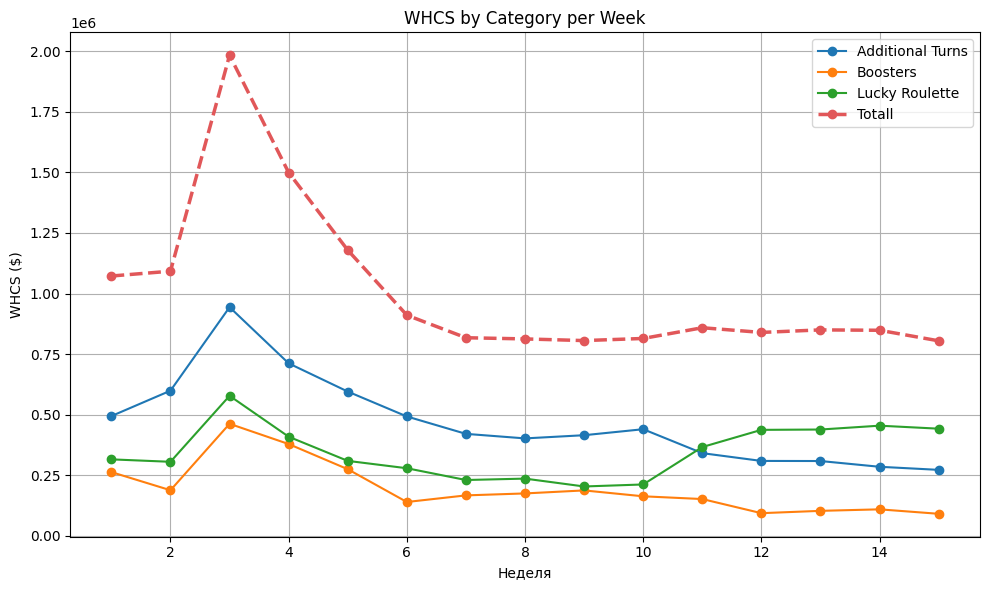

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(df_pivot_whcs.index, df_pivot_whcs['Additional Turns'], marker='o', label='Additional Turns')
plt.plot(df_pivot_whcs.index, df_pivot_whcs['Boosters'], marker='o', label='Boosters')
plt.plot(df_pivot_whcs.index, df_pivot_whcs['Lucky Roulette'], marker='o', label='Lucky Roulette')
plt.plot(df_pivot_whcs.index, df_pivot_whcs['totall'], marker='o', linewidth=2.5, linestyle='--', label='Totall', color='#E15759')

plt.title('WHCS by Category per Week')
plt.xlabel('Неделя')
plt.ylabel('WHCS ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

График показывает, что пик трат пришёлся на 3-ю неделю - резкий рост наблюдается по всем категориям. Далее фиксируется устойчивое снижение, при этом Lucky Roulette дольше сохраняет высокий уровень и даже демонстрирует рост после 10-й недели. Общий тренд - снижение потребления хард-валюты, что может указывать на угасание интереса после ивента.

Стоит обратить внимание, что на 11 неделе лидером 🥇 по тратам хард-валюты стал Lucky Roulette.

<br>

Посмотрим на **структуру WHCS**.

In [14]:
df_share_whcs = df_pivot_whcs[['Additional Turns', 'Boosters', 'Lucky Roulette']].div(df_pivot_whcs['totall'], axis=0).round(2)
df_share_whcs.head()

Goods ID,Additional Turns,Boosters,Lucky Roulette
Week,,,
1,0.46,0.25,0.29
2,0.55,0.17,0.28
3,0.48,0.23,0.29
4,0.47,0.25,0.27
5,0.50,0.23,0.26


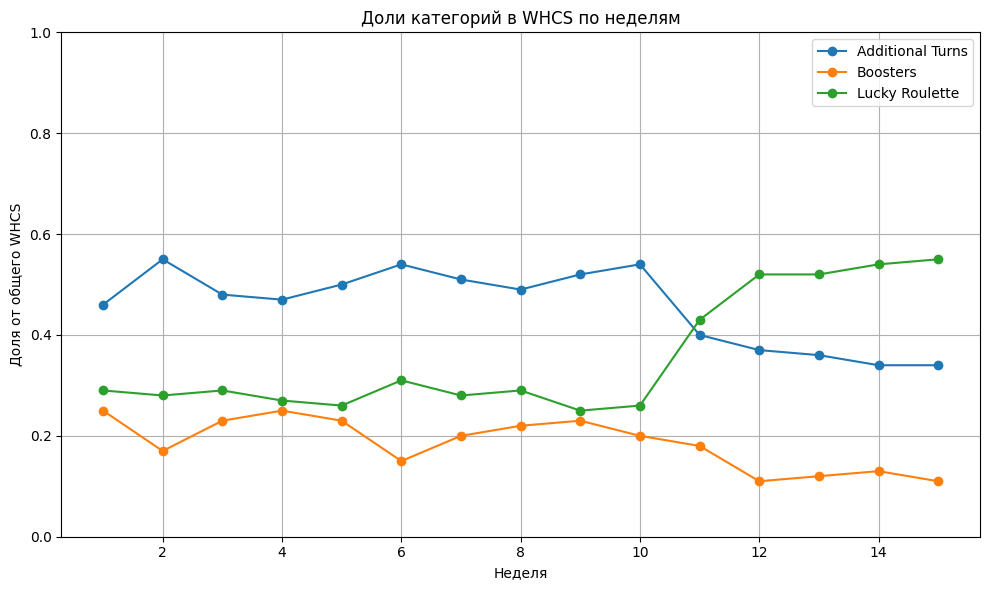

In [15]:
plt.figure(figsize=(10, 6))

plt.plot(df_share_whcs.index, df_share_whcs['Additional Turns'], marker='o', label='Additional Turns')
plt.plot(df_share_whcs.index, df_share_whcs['Boosters'], marker='o', label='Boosters')
plt.plot(df_share_whcs.index, df_share_whcs['Lucky Roulette'], marker='o', label='Lucky Roulette')

plt.title('Доли категорий в WHCS по неделям')
plt.xlabel('Неделя')
plt.ylabel('Доля от общего WHCS')
plt.ylim(0, 1) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

1. До 11 недели доминирующая категория - Additional Turns. В этот период она составляет от 46% до 55% от всех трат. После её доля постепенно снижается до 34%, уступая лидерство Lucky Roulette.

2. Категория Lucky Roulette до 10-й недели занимает 25-29% в общем объёме трат, а затем происходит заметный рост - до 55% к 15-й неделе.

3. Категория Boosters уверенно держится на уровне 20-25% до 10-й недели, но затем резко падает до 11%. Это может быть связано с потерей интереса к механике или её нерелевантностью для оставшейся аудитории. 

Изменение структуры WHCS отражает перераспределение интереса игроков. Увеличение доли Lucky Roulette может быть связано с усилением данной механники, в то время как падение долей Additional Turns и Boosters может говорить о снижении потребности в этих инструментах. **Почему❓** **Необходим более детальный анализ.**

<br>

💡 Также можно заметить, что Additional Turns и Boosters снижаются довольно синхронно. Можно **предположить**, что что-то не так с балансом сложности: вероятно, уровни стали слишком лёгкими и не создают должного челленджа, что снижает потребность в этих механиках.

<br>

<span style="color:#FF6861"> **WHCS / WAU**</span> (название метрики требует уточнения 😅)

Показателем качества аудитории и её монетизации является метрика ARPWAU, которая показывает, сколько в среднем 💵 приносил каждый игрок.

Рассмотрим с другой стороны - не монетизацию, а поведение в разрезе категорий внутриигровых трат.

Рассчитаем **среднюю трату хард-валюты на одного активного пользователя** (WHCS / WAU). Это позволяет нормализовать общие траты и оценить поведение игроков независимо от размера аудитории. Это важно, потому что WHCS может меняться просто из-за изменения WAU, не отражая при этом качественных изменений в поведении игроков.

In [16]:
df_whcs_per_wau = df_pivot_whcs.merge(df_wau, on='Week', how = 'inner')
df_whcs_per_wau = df_whcs_per_wau [['Additional Turns', 'Boosters', 'Lucky Roulette', 'totall']].div(df_whcs_per_wau['WAU'], axis=0).round(2)
df_whcs_per_wau.head()

,Additional Turns,Boosters,Lucky Roulette,totall
0,1.95,1.04,1.24,4.23
1,2.36,0.74,1.21,4.31
2,2.01,0.99,1.23,4.23
3,1.91,1.02,1.10,4.03
4,2.11,0.97,1.10,4.18


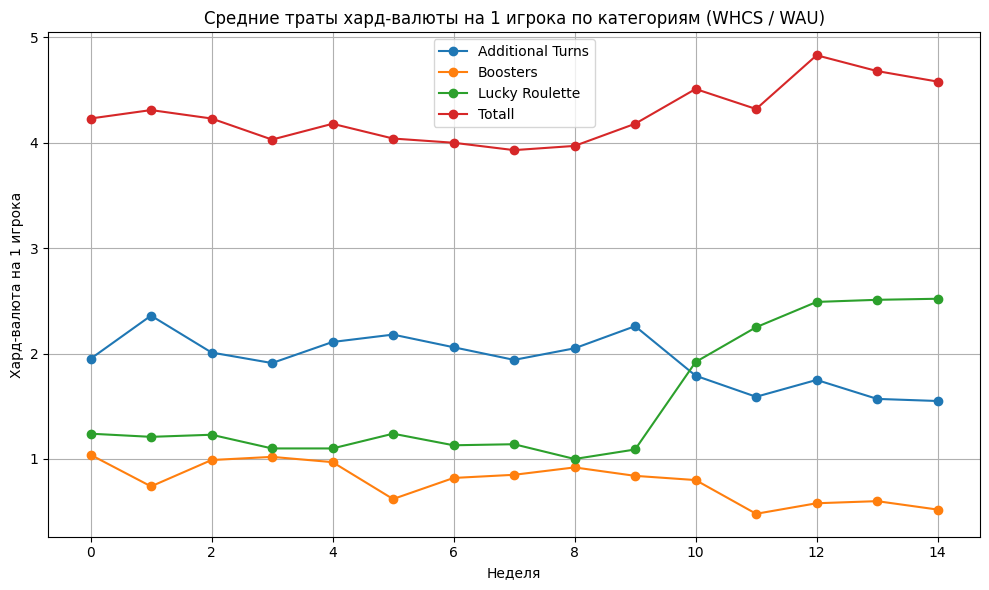

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(df_whcs_per_wau.index, df_whcs_per_wau['Additional Turns'], marker='o', label='Additional Turns')
plt.plot(df_whcs_per_wau.index, df_whcs_per_wau['Boosters'], marker='o', label='Boosters')
plt.plot(df_whcs_per_wau.index, df_whcs_per_wau['Lucky Roulette'], marker='o', label='Lucky Roulette')
plt.plot(df_whcs_per_wau.index, df_whcs_per_wau['totall'], marker='o', label='Totall')

plt.title('Средние траты хард-валюты на 1 игрока по категориям (WHCS / WAU)')
plt.xlabel('Неделя')
plt.ylabel('Хард-валюта на 1 игрока')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Как видно на графике: 

1. Additional Turns - остаётся самой затратной категорией до 10-й недели (в среднем 2.0-2.3 🪙 на игрока). После 10-й недели наблюдается устойчивое снижение до 1.55. Это может говорить о снижении сложности уровней или ослаблении потребности в дополнительных попытках.

2. Boosters - показывают нестабильность, но в целом убывающий тренд. После 10-й недели траты снижаются почти вдвое (с 0.8 🪙 до 0.5). Это также может указывать на потерю ценности механики.

3. Lucky Roulette - яркий рост после 10-й недели: от стабильных 1.1-1.2 🪙 до 2.52. Вероятно, механика была усилена, изменены награды или условия. Однако на текущем объёме данных сложно сделать однозначный вывод.

4. <span style="color:#FF6861"> **Totall.**</span> Cуммарные траты на 1 игрока находятся на уровне: 4.0-4.8 🪙, без резких провалов или всплесков. Их рост синхронен с ростом трат на Lucky Roulette. Это говорит о том, что игроки продолжают тратить примерно столько же, но распределение трат между категориями меняется. Таким образом, наблюдается не падение "платежеспособности", а смещение предпочтений в сторону Lucky Roulette.

⚠️ Игроки начали всё больше тратить на Lucky Roulette, и всё меньше - на остальные механики. Это может указывать на потенциальные проблемы с балансом сложности или с привлекательностью других категорий трат.

Необходим дополнительный анализ:
- Какие внутриигровые изменения произошли после 10-й недели?
- Что сделало Lucky Roulette более привлекательной?
- Почему снизилась ценность Additional Turns и Boosters?


Итак, мы изучили данные...    
Переходим к следующему вопросу.

<br>

## Вопрос 2: Интерпретация данных

- Поделитесь своими мыслями о том, что в целом можно сказать о проекте на основе представленных данных.
- Опишите, что необычного, аномального или интересного вы увидели, изучив предоставленные данные. Если вы что-то такое обнаружили, обязательно опишите возможные причины, объясняющие наличие этих аномалий и необычностей.
- Опишите, какие проблемы проекта вы выявили, изучив данные. Объясните, как вы пришли к выводу о наличии той или иной проблемы. Обоснованием могут быть как представленные данные и метрики, рассчитанные на их основе, так и общее понимание индустрии, знания, личный опыт и просто здравый смысл.

<br>

Детальный анализ с промежуточными умозаключениями был проведён в предыдущем разделе, поэтому здесь подведём итог и соберём всё воедино.

<br>

**Общая картина**

Проект демонстрирует сильный всплеск активности на 3-й неделе, после чего начинается устойчивое снижение. Это указывает на наличие мощного краткосрочного триггера (возможно, ивента), который активизировал игроков, но не закрепил интерес в долгосрочной перспективе.

<br>

**Интересные наблюдения и аномалии**

1. 3-я неделя резко выбивается из общего тренда по всем метрикам и категориям трат - это может быть результатом внутриигрового события или промоакции.

2. ARPWAU заметно просаживается на неделях с аномально высоким WAU ( 3-я неделя), что может указывать на приток менее платёжеспособной / нецелевой аудитории / некачественный трафик.

2. После спада трат хард-валюты,  Lucky Roulette дольше остальных категорий сохраняет высокий уровень и даже показывает рост после 10-й недели, в отличие от других категорий. Это может свидетельствовать о более высокой вовлечённости, успешных изменениях в её наградах или механике. 📈 Такой паттерн заслуживает дополнительного анализа: возможно, стоит использовать её как основу для других событий или расширить линейку предложений, связанных с ней.


<br>

**⚠️ Возможные проблемы**

1. <span style="color:#E15759">Слабое удержание </span> - несмотря на скачок вовлечённости, большинство пользователей не остаются надолго. Скорее всего, отсутствуют механики, которые поддерживают интерес после события.
2. <span style="color:#E15759">Нисходящий тренд</span> - после пика идёт устойчивое снижение по большинству метрик. Это может говорить о недостаточной вовлечённости или истощении интереса к текущему контенту.
3. <span style="color:#E15759">Подозрение на некачественный трафик</span> - если рост активности был обеспечен притоком новых пользователей, но при этом метрики удержания (RR1, RR7) остались низкими, это может указывать на неэффективные маркетинговые кампании или неверную настройку привлечения.
4.  Изменение структуры WHCS с 11 недели, где лидером 🥇 стал Lucky Roulette, также говорит об ослаблении другой категории - Additional Turns. Одновременно происходит падение категории Boosters. Возможная причина: <span style="color:#E15759">Баланс сложности</span> . **Требуется детальный анализ. Мало данных.**     
Стоит отметить, что несмотря на изменение структуры WHCS, средняя сумма трат на одного пользователя (WHCS/WAU) остаётся довольно стабильной (4-4.8🪙). Это говорит о том, что игроки продолжают тратить, но просто иначе распределяют средства. Главный вопрос - почему?


<br>

## Вопрос 3: Идеи и предложения
- Опишите, какие еще данные вы хотели бы получить, какие метрики рассчитать? Для чего вы использовали бы эти метрики и как они помогли бы вам лучше понять или решить имеющиеся у проекта проблемы?

- Сформируйте набор идей и предложений по улучшению проекта с учетом выявленных ранее проблем. Это могут быть как конкретные идеи по добавлению в проект каких-либо механик и изменений, так и предложения провести дополнительные исследования, либо даже А/В тесты. Представьте, что вы - аналитик этого проекта и можете предлагать команде абсолютно любые идеи, главное чтобы они помогли решить текущие проблемы и сделали проект лучше.

<br>

Поскольку предоставленные тестовые данные агрегированы по неделям и весьма ограничены, чтобы глубже понять поведение пользователей и причины снижения активности, было бы полезно собрать **дополнительные данные** более низкого уровня:

- события установки, регистрации, входа, начала и завершения сессий;
- источники трафика, устройства / платформы, версии игры;
- прохождение или пропуск туториала;
- действия пользователей в игре: прохождение уровней, участие в ивентах, получение наград;
- информация о платежах и покупательской активности в магазине.

⚠️ Хранение данных стоит денег 💵. При ограниченном бюджете важно фокусироваться на ключевых событиях с достаточной детализацией, чтобы сократить объём логов и сохранить ценность для анализа. Слишком подробные данные также могут мешать: избыточная детализация увеличивает «шум» и усложняет поиск инсайтов.   
Поэтому стоит тщательно продумывать структуру событий и набор атрибутов, чтобы сохранять только действительно полезную информацию.

<br>

А на основании этих данных рассчитать **следующие метрики**:

- <span style="color:#FF6861">Прохождения Tutorial</span>. Включает несколько связанных метрик:    
    - **Tutorial COR (Completion Rate)** - доля пользователей, завершивших обучение.
    - **Tutorial Skip Rate** - доля пользователей, пропустивших обучение.
    - **Скорость прохождения туториала** - среднее время от запуска игры до завершения обучения.     
    <span style="color:#A1406B">Бизнес-смысл:</span> Эти метрики помогают понять, насколько обучение понятно, интересно и эффективно. Если COR низкий или Skip Rate высокий - вероятны проблемы с дизайном или темпом туториала. Туториал формирует первое впечатление и сильно влияет на возвращаемость игроков.
        
- <span style="color:#FF6861">**Retention (RR1, RR7, RR30)**</span> - одна из метрик, отражающая «удержание пользователей» игрой. Она говорит о том, продолжают ли люди пользоваться продуктом снова и снова, находят ли они его достаточно ценным (интересным/увлекательным/качественным) для себя. Т.е. данная метрика напрямую связана с пользовательским опытом и качеством продукта. Если пользователю нравится игра или любой другой продукт, он с радостью будет в неё/него возвращаться, а значит, он потенциально готов платить или смотреть рекламу.    
Если коротко, то Retention показывает сколько людей (процент пользователей) вернулись в день Х (неделю Х, месяц Х) после первого входа в продукт (Day 0).    
    <span style="color:#A1406B">*Бизнес-смысл:*</span> Чем дольше пользователь остается в проекте, тем выше вероятность совершения платежа, его размер и/или больше количество просматриваемой рекламы. Соответственно высокий уровень удержания пользователей напрямую влияет на доходность и успешность продукта.    
Особое внимание следует уделять RR1. Этот показатель отражает первое впечатление пользователя о проекте и его реакцию на интерфейс и функционал, и в последующем оно влияет на удержание последующих дней.

- <span style="color:#FF6861">**ARPU**</span> - средний доход с одного активного пользователя за определенный период времени.   
    <span style="color:#A1406B">*Бизнес-смысл:*</span> метрика, которая позволяет оценить общий доход, получаемый от всех пользователей, включая как платящих, так и неплатящих. Это помогает оценить общую эффективность продукта.   
    <span style="color:#A1406B">*Примечание:* </span> ARPWAU - это ARPU, рассчитанный за неделю. Если нужно оценить монетизацию в другом масштабе - например, за день или месяц, - используется ARPU за соответствующий период.

- <span style="color:#FF6861">**ARPPU**</span> - средний доход с одного платящего пользователя.  
    <span style="color:#A1406B">*Бизнес-смысл:*</span>  Позволяет понять, насколько хорошо продукт генерирует доход с платящих пользователей.

- <span style="color:#FF6861">**Paying Share**</span> - процент платящих пользователей от общего числа.   
    <span style="color:#A1406B">*Бизнес-смысл:*</span> Характеризует ширину воронки монетизации. Высокая доля платящих говорит о доступности и привлекательности офферов.

- <span style="color:#FF6861">**Conversion to Purchase**</span> - процент пользователей, совершивших первую покупку, и путь, по которому они к ней пришли.     
    <span style="color:#A1406B">*Бизнес-смысл:*</span> Помогает найти точки фрустрации или наоборот - сильные стимулы к покупке. Указывает, какие игровые элементы лучше всего мотивируют к трате денег.

- <span style="color:#FF6861">**Сегментация игроков:**</span>  новые / вернувшиеся / активные / платящие. Позволяет анализировать поведение разных групп пользователей.    
    <span style="color:#A1406B">*Бизнес-смысл:*</span> Даёт понимание, кто вносит наибольший вклад в доход, кто наиболее лоялен, кто обеспечивает всплески. Это основа для персонализированных офферов и таргетированной коммуникации.
 
- <span style="color:#FF6861">**Поведение игроков до/после события:**</span> - анализ активности до, во время и после ивентов.    
    <span style="color:#A1406B">*Бизнес-смысл:*</span> Позволяет оценить эффективность игровых событий: вызывают ли они прирост активности, как долго держится эффект, какие игроки вовлекаются, а кто уходит.

- <span style="color:#FF6861">**Прогресс в игре**</span> (достигнутые уровни, задания, достижения) - показывает, как глубоко пользователи проходят контент.     
    <span style="color:#A1406B">*Бизнес-смысл:*</span> Помогает понять, на каких этапах интерес угасает, где игроки "застревают" и отваливаются. Также даёт представление о сложности и сбалансированности контента.

- <span style="color:#FF6861">**Скорость прохождения контента**</span>  - среднее время от начала игры до завершения ключевых этапов.    
    <span style="color:#A1406B">*Бизнес-смысл:*</span> Если игроки слишком быстро проходят основной контент, это может привести к выгоранию или оттоку. Это сигнал о необходимости добавления более глубоких уровней прогрессии или контента для опытных игроков, прошедших основную часть игры.
    
Эти метрики позволят не только понять структуру спада, но и выявить точки роста.

В игровом анализе существует достаточно большое количество метрик, каждая из которых имеет свой фокус и значение. От Retention и ARPU до LTV, CARPU, Conversion и Paying Share - все эти показатели предоставляют информацию о разных аспектах взаимодействия пользователей с продуктом. Важно понимать, что для правильного анализа необходимо выбирать те метрики, которые наилучшим образом отражают текущие бизнес-цели и контекст.
Важно, чтобы выбранные метрики помогали решать конкретные задачи и обеспечивали практическую ценность, что, на мой взгляд, и обеспечивают предложенные в этом разделе метрики.

<br>


 **📈 Мои предложения по улучшению проекта:**

1. Анализ и корректировка баланса сложности. Наблюдается падение трат на Boosters и Additional Turns - возможно, игрокам стало слишком легко. Необходимо проверить, не снизился ли общий челлендж в игре.

2. Необходимо выяснить, кто обеспечил прирост: новые, вернувшиеся или платящие пользователи. Проанализировать их действия и определить, что именно сработало - игровая механика, оформление события, ценность наград, ограниченность по времени и т.д.   
Также важно провести сегментацию по дополнительным признакам: страна, возраст, платформа, версия клиента, источник трафика - это поможет выявить наиболее ценные аудитории и каналы.

4. Когортный анализ. Выделить когорты с высоким retention и/или монетизацией, изучить их поведение, сегментировать и масштабировать успешные сценарии. Использовать выводы для настройки маркетинга и внутриигровых предложений.

4. Увеличение долгосрочной вовлечённости. Ввести цепочку связанных событий с общей прогрессией и тематикой. Добавить игровые активности после окончания ивентов, например, квесты или бонусные миссии. Реализовать бонус за возвращение через несколько дней после завершения события.

5. Повышение персонализации. Внедрить сегментацию игроков по поведению и интересам. Настраивать офферы, награды, ивенты и даже порядок появления экранов в зависимости от сегмента.

6. Улучшение аналитики и понимания поведения игроков. Необходимо выявить ключевые моменты, после которых пользователи чаще всего покидают игру. Например, момент завершения обучения, первая попытка покупки, первое поражение и другие критические точки. Также стоит построить «воронку поведения» - путь игрока от установки до ключевых действий, чтобы определить, на каком этапе теряется больше всего пользователей.

7. Проведение дополнительных исследований. Интервью или опросы пользователей для выявления причин ухода, снижения активности или непопулярности определённых механик.

8. Запуск серии A/B тестов. Протестировать разные форматы событий, схемы наград, продолжительность активностей, условия входа. Важно тестировать и экономику: стоимость, ценность паков, конверсии для разных сегментов игроков.   
Пример: протестировать новый туториал или протестировать разные визуальные представления Lucky Roulette.

9. Работа над повышением качества самой игры. Ключевыми факторами удержания остаются базовые элементы: геймплей, визуал, плавность обучения, сбалансированная сложность, стабильность клиента, разнообразие контента и внутриигровая мотивация.


⚠️ Предоставленных данных недостаточно для построения полной картины и формулирования точных выводов.
Чтобы дать обоснованные рекомендации, необходим контекст: понимание продукта, его целевой аудитории, воронки онбординга, каналов привлечения, событийной активности, а также внутриигровых изменений, происходивших на анализируемом отрезке времени.

Ведь суть работы продуктового аналитика - не просто обработка данных, а глубокое понимание продукта, бизнес-целей и пользовательского опыта.

<br>

###  Спасибо за интересное тестовое, было полезно поразмышлять над задачами! Хорошего дня! 😊🤝